In [9]:
# Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Name of the CSV file
data = 'final_sales_data.csv'

In [11]:
#Put into data frame
data_df = pd.read_csv(data)

In [12]:
data_df.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


The lower quartile of gas prices is: 2.3077500000000004
The upper quartile of gas prices is: 3.2190000000000003
The interquartile range of gas prices is: 0.9112499999999999
The median of gas prices is: 2.7165 
The mean of gas prices is: 2.781387755102041 
Values below 0.9408750000000006 could be outliers.
Values above 4.585875 could be outliers.


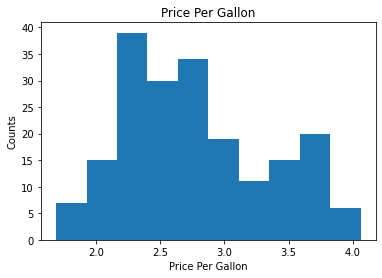

In [13]:
# Create empty list to fill 

gas_prices = data_df["Price Per Gallon"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = gas_prices.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=data_df['Price Per Gallon'].mean()

print(f"The lower quartile of gas prices is: {lowerq}")
print(f"The upper quartile of gas prices is: {upperq}")
print(f"The interquartile range of gas prices is: {iqr}")
print(f"The median of gas prices is: {quartiles[0.5]} ")
print(f"The mean of gas prices is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(data_df['Price Per Gallon'])
plt.xlabel('Price Per Gallon')
plt.ylabel('Counts')
plt.title('Price Per Gallon')
plt.savefig('Images/Gas Histogram.png', dpi=100)
plt.show()

In [14]:
gas_prices = data_df["Price Per Gallon"].tolist()

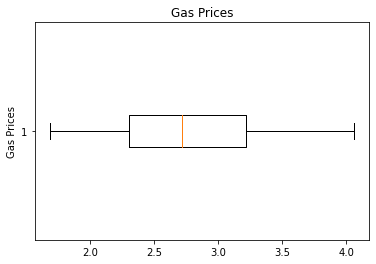

In [15]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Gas Prices')
ax1.set_ylabel('Gas Prices')
ax1.boxplot(gas_prices, vert=False, flierprops=green_diamond)
plt.show()

In [16]:
# Determine outliers using upper and lower bounds
quartiles1 = data_df['Price Per Gallon'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
gas_outliers=data_df[(data_df["Price Per Gallon"]< lower_bound1) |
                                (data_df["Price Per Gallon"]> upper_bound1)]
gas_outliers

0.9408750000000006 - 4.585875


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index


In [17]:
data_df.to_csv("final_gas_data.csv",encoding="utf-8", index=False, header=True)